In [1]:
os.environ["SAGE_NUM_THREADS"] = '10'

In [2]:
from ore_algebra import *
from lefschetz_family import Hypersurface
import numperiods

In [3]:
import logging
logging.basicConfig()
logging.getLogger('lefschetz_family.hypersurface').setLevel(logging.INFO)

In [4]:
def plot_points(l, **kwds):
    return list_plot([[c.real(), c.imag()] for c in l],**kwds)
def plot_path(l, **kwds):
    return list_plot([[c.real(), c.imag()] for c in l], True, **kwds)

In [5]:
R.<X,Y,Z> = PolynomialRing(QQ)

In [6]:
Pfermat = X^3+Y^3+Z^3

In [7]:
%time elliptic_curve = Hypersurface(Pfermat, nbits=1000, fibration = [vector([0,1,0]),vector([2,0,1])])

INFO:lefschetz_family.hypersurface:[1] Computing fundamental group with 6 critical values.
INFO:lefschetz_family.hypersurface:[1] Fundamental group computed in 00:00:01.


CPU times: user 2.35 s, sys: 172 ms, total: 2.52 s
Wall time: 2.02 s


In [8]:
elliptic_curve._RtoS()

Ring morphism:
  From: Multivariate Polynomial Ring in X, Y, Z over Rational Field
  To:   Univariate Polynomial Ring in t over Multivariate Polynomial Ring in X, Z over Rational Field
  Defn: X |--> X
        Y |--> (2*X + Z)*t
        Z |--> Z

In [9]:
elliptic_curve.basepoint

-5/3

In [10]:
plot_critical_points = plot_points(elliptic_curve.critical_values, color="red", pointsize=50)
plot_basepoint = plot_points(elliptic_curve.basepoint, color="green", pointsize=50)
plot_critical_points + plot_basepoint

In [11]:
plot_paths = [plot_path(path, color="orange", thickness=2) for path in elliptic_curve.paths]
plot_paths[3] + plot_critical_points + plot_basepoint

The fibre is simply three points

In [12]:
elliptic_curve.fiber.P

-973/27*X^3 - 500/9*X^2*Z - 250/9*X*Z^2 - 98/27*Z^3

In [13]:
elliptic_curve.fiber.homology

[(1, 0, 0), (0, 1, 0), (0, 0, 1)]

Each loop induces a monodromy actions that acts on the fibre as a permutation of its points

In [14]:
show(elliptic_curve.monodromy_matrices)

INFO:lefschetz_family.hypersurface:[1] Computing Picard-Fuchs equations of 2 forms in dimension 1
INFO:lefschetz_family.hypersurface:[1] Operator [1/2] has order 2 and degree 7 for form with numerator of degree 0
INFO:lefschetz_family.hypersurface:[1] Operator [2/2] has order 2 and degree 23 for form with numerator of degree 3
INFO:lefschetz_family.hypersurface:[1] Computing numerical transition matrices of operator of order 3 and degree 7 (26 edges total).
INFO:lefschetz_family.hypersurface:[1] Integration finished -- total time: 00:00:02.


[
[0 0 1]  [1 0 0]  [0 1 0]  [0 0 1]  [0 0 1]  [1 0 0]
[0 1 0]  [0 0 1]  [1 0 0]  [0 1 0]  [0 1 0]  [0 0 1]
[1 0 0], [0 1 0], [0 0 1], [1 0 0], [1 0 0], [0 1 0]
]

In [15]:
elliptic_curve.vanishing_cycles

[(1, 0, -1), (0, 1, -1), (1, -1, 0), (1, 0, -1), (1, 0, -1), (0, 1, -1)]

In [16]:
matrix(elliptic_curve.vanishing_cycles).kernel().basis()

[
(1, 0, 0, 0, -1, 0),
(0, 1, 0, 0, 0, -1),
(0, 0, 1, 0, -1, 1),
(0, 0, 0, 1, -1, 0)
]

In [17]:
elliptic_curve.infinity_loops

[(-1, 1, 1, -1, 1, 0), (0, -1, 0, 1, -1, 1), (1, 0, -1, 0, 0, -1)]

In [18]:
elliptic_curve.extensions

INFO:lefschetz_family.hypersurface:[1] Reconstructed homology from monodromy -- total time: 00:00:00.


[(1, 0, 0, 0, -1, 0), (0, 1, 0, 0, 0, -1)]

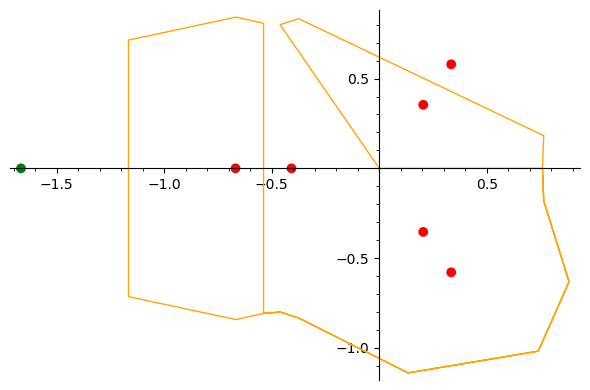

In [19]:
from lefschetz_family.util import Util
path = elliptic_curve.paths[0] + elliptic_curve.paths[4]
path = elliptic_curve.paths[1] + elliptic_curve.paths[5]
path = Util.simplify_path(path)
path = path[len(path)//2:] + path[:len(path)//2+1]
path = Util.simplify_path(path)

plot_path(path, color="orange") + plot_critical_points + plot_basepoint

In [20]:
elliptic_curve.picard_fuchs_equation(0)

(49*t^7 + 18*t^4 + t)*Dt^2 + (343*t^6 + 45*t^3 - 2)*Dt + 392*t^5

In [21]:
%time show(elliptic_curve.period_matrix)

INFO:lefschetz_family.hypersurface:[1] Computing numerical transition matrices of operator of order 3 and degree 23 (26 edges total).
INFO:lefschetz_family.hypersurface:[1] Integration finished -- total time: 00:00:05.


[                                                                                                                                                                                                                                                                                                       [-1.7666387502854499573136894996484387025718685382025575301269052418354530017281079136054869933333835872193428746302541956493780242904087870920272059550031562633404848651818721347361136787353039616973446853289920402608132547126717179149276694474089862161106841051441668741368864302779671188019 +/- 2.43e-290] + [+/- 1.66e-290]*I [-0.88331937514272497865684474982421935128593426910127876506345262091772650086405395680274349666669179360967143731512709782468901214520439354601360297750157813167024243259093606736805683936765198084867234266449602013040662735633585895746383472370449310805534205257208343706844321513898355940095 +/- 4.74e-291] + [-1.52995403705719287491319417230882435857282894716092949606181168590952236179937427646883852056587534465250994548267024715300186836007974973529056822838057049358993383490910767593174885300177648989808513077068542302497695197300658987624856809275371565333293813178164824396589705657167160122988 +/- 5.14e-291]*I]
[                                                                                                                                                                                                                                                                                                           [0.2281544686599085756703589929554487763185612695785767613071796486797796739377461154811503454922274003700853902473638883907983159865781202325051495232427521106350100647977259828891279032236991131220173402786303289241135678151607440991819288887132074593748348772886634664826802527464378915 +/- 6.72e-287] + [+/- 3.20e-287]*I        [0.11407723432995428783517949647772438815928063478928838065358982433988983696887305774057517274611370018504269512368194419539915799328906011625257476162137605531750503239886299144456395161184955656100867013931516446205678390758037204959096444435660372968741743864433173324134012637321894577 +/- 4.83e-288] + [-0.19758756584642137683675361383795842252092340538325624009603588895971150453889647557540641808961588966628824374804424096802542409319258858317309098328997380910379449933487265031787339602585594311649993250457369360297693307085260831781410956636889897387966496010027911893298234132814490813 +/- 5.83e-288]*I]

CPU times: user 103 ms, sys: 145 ms, total: 248 ms
Wall time: 5.55 s


### A cubic surface

In [22]:
R2.<W,X,Y,Z> = PolynomialRing(QQ)

In [23]:
P = X^3+Y^3+Z^3+W^3

In [24]:
fibration = [vector(ZZ, [4, -4, 2, 1]), vector(ZZ, [10, 4, -7, -2]), vector(ZZ, [2, 3, -10, 1])]

In [25]:
surface = Hypersurface(P, nbits=1000, method="voronoi", fibration=fibration)

INFO:lefschetz_family.hypersurface:[2] Computing fundamental group with 12 critical values.
INFO:lefschetz_family.hypersurface:[2] Fundamental group computed in 00:00:01.


In [26]:
surface.fiber.P

INFO:lefschetz_family.hypersurface:[1] Computing fundamental group with 6 critical values.
INFO:lefschetz_family.hypersurface:[1] Fundamental group computed in 00:00:00.


274633/125*X^3 + 258/125*X^2*Y + 5547/250*X*Y^2 + 2276507/1000*Y^3 + 48/125*X^2*Z + 1032/125*X*Y*Z + 5547/125*Y^2*Z + 96/125*X*Z^2 + 1032/125*Y*Z^2 + 274689/125*Z^3

In [27]:
%time show(surface.fiber.period_matrix)

INFO:lefschetz_family.hypersurface:[1] Computing Picard-Fuchs equations of 2 forms in dimension 1
INFO:lefschetz_family.hypersurface:[1] Operator [1/2] has order 2 and degree 9 for form with numerator of degree 0
INFO:lefschetz_family.hypersurface:[1] Operator [2/2] has order 2 and degree 27 for form with numerator of degree 3
INFO:lefschetz_family.hypersurface:[1] Computing numerical transition matrices of operator of order 3 and degree 9 (31 edges total).
INFO:lefschetz_family.hypersurface:[1] Integration finished -- total time: 00:00:01.
INFO:lefschetz_family.hypersurface:[1] Reconstructed homology from monodromy -- total time: 00:00:00.
INFO:lefschetz_family.hypersurface:[1] Computing numerical transition matrices of operator of order 3 and degree 27 (31 edges total).
INFO:lefschetz_family.hypersurface:[1] Integration finished -- total time: 00:00:04.


[ [-0.0003974735421301406576042534965361846548099518689283941726462045908875044629764084688083296786604084562689810448668186752579324687517955143811112525695161726570001473372697108871155143021911105147648705521178100965168454379121528683347606510511373189574430606786253742109149266885713416931617666686 +/- 3.34e-299] + [0.0006878075780757468364905019903015139427723071219677722145658521109741353756217048823573667968303984988152706556656476811576179575140633872213735521635220834815879461157848519528652814348126806150334093052862804978371661053712488375735575060978260297421336694674937993758526480417476787572795135821 +/- 2.92e-299]*I                                                                                                                                                                                                                                                                                                                [0.0007949470842602813152085069930723693096199037378567883452924091817750089259528169376166593573208169125379620897336373505158649375035910287622225051390323453140002946745394217742310286043822210295297411042356201930336908758243057366695213021022746379148861213572507484218298533771426833863235333372 +/- 5.50e-299] + [+/- 1.11e-299]*I]
[[-6.0320753239541317780795039136965018954475661679217252402623997468587379441740535109108527873851026789081516454167489474019759299646893686947750856312115296402530258020391453265582770107311537222377135402860617203439623707840478920601432359803702140138601690122468289926396689803809785011149223343e-8 +/- 6.68e-304] + [1.04285479759373653186460204043098518094501360015509510813284998158123455475518815683417993412091720695313073324658338894811902800252101379826579943409529567081510329082992360618776252310495165647697269040604084019807947851895781020065357867979128995788284328851719172999642762046516680297046920133e-7 +/- 5.87e-304]*I                                                                                                                                                                                                                                                                                                               [1.20641506479082635561590078273930037908951323358434504805247994937174758883481070218217055747702053578163032908334978948039518599293787373895501712624230592805060516040782906531165540214623074444754270805721234406879247415680957841202864719607404280277203380244936579852793379607619570022298446685e-7 +/- 8.25e-304] + [+/- 4.31e-304]*I]

CPU times: user 346 ms, sys: 314 ms, total: 660 ms
Wall time: 6.39 s


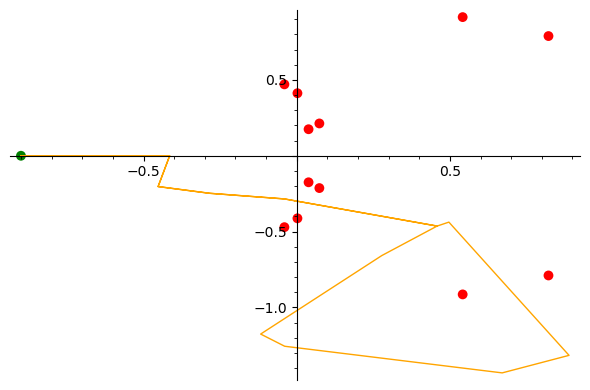

In [28]:
plot_critical_points_surface = plot_points(surface.critical_values, color="red", pointsize=50)
plot_basepoint_surface = plot_points([surface.basepoint], color="green", pointsize=50)
plot_paths_surface = [plot_path(path, color="orange") for path in surface.paths]

plot_paths_surface[2] + plot_critical_points_surface + plot_basepoint_surface

In [29]:
L = surface.picard_fuchs_equation(0)
print("order:", L.order(), "; degree:", L.degree())
L

INFO:lefschetz_family.hypersurface:[2] Computing Picard-Fuchs equations of 6 forms in dimension 2
INFO:lefschetz_family.hypersurface:[2] Operator [1/6] has order 2 and degree 57 for form with numerator of degree 2
INFO:lefschetz_family.hypersurface:[2] Operator [2/6] has order 2 and degree 57 for form with numerator of degree 2
INFO:lefschetz_family.hypersurface:[2] Operator [3/6] has order 2 and degree 57 for form with numerator of degree 2
INFO:lefschetz_family.hypersurface:[2] Operator [4/6] has order 2 and degree 57 for form with numerator of degree 2
INFO:lefschetz_family.hypersurface:[2] Operator [5/6] has order 2 and degree 57 for form with numerator of degree 2
INFO:lefschetz_family.hypersurface:[2] Operator [6/6] has order 2 and degree 57 for form with numerator of degree 2


order: 2 ; degree: 57


(875034027259794772564938255259433182256356005962094245704*t^57 - 4779374993886232550645822360139817694629268447584127150380*t^56 + 12761422019963144998112909882711709678026707129106867574170*t^55 - 18107557498020549705456380583083449995801871006943380873749*t^54 + 9239836994072297635893905982992519312382893429121746131471*t^53 + 18368641302022631699238070073076380158787962266281997919207*t^52 - 45842547464928256524253135293558878150629334359750419206699*t^51 + 50960109564389437247399630645731504108661824473995068540888*t^50 - 22555377634855007875706176417077769984318112185053598995926*t^49 - 15654117951764795337576747147292421197768303323405154495200*t^48 + 46695036321610910441039726827795355933448512174257793879714*t^47 - 47978612947399639946868093318631296970389224526430636134142*t^46 + 33142191867806361497836325597184847747492834554053730807576*t^45 - 1855873013416913947357982851531614646698584723384662115162*t^44 - 15825053662328230495792274083762508194800306065117810340362*t^43 +

We obtain the integral monodromy matrices from the monodromy of a differential operator by a **transcendantal** change of basis

In [30]:
%%time
CB = surface.derivatives_values_at_basepoint(0).submatrix(1,0)
M = CB^-1*L.numerical_transition_matrix(surface.paths[2], assume_analytic=True, eps=2^-300)*CB; show(M)

[[1.00000000000000000000000000000000000000000000000000000000000000000000000000 +/- 1.47e-76] + [-1250.302617636739279982077329387606475797946504494745889910414653106443817829205 +/- 6.11e-76]*I                                                                                [+/- 9.66e-73] + [8238660.55175342440590725896452351905948113924479678383204303808707219155088269 +/- 2.52e-72]*I]
[                                                                            [+/- 2.23e-80] + [-0.1897464552458804969285322230195639387008535492492885649539763971158582494690450 +/- 3.97e-80]*I [1.000000000000000000000000000000000000000000000000000000000000000000000000000 +/- 1.47e-76] + [1250.302617636739279982077329387606475797946504494745889910414653106443817829205 +/- 6.11e-76]*I]

CPU times: user 14.5 s, sys: 106 ms, total: 14.6 s
Wall time: 14.6 s


In [31]:
periods_fibre =  surface.fiber.period_matrix.submatrix(0,0,2,2); show(periods_fibre)

[ [-0.0003974735421301406576042534965361846548099518689283941726462045908875044629764084688083296786604084562689810448668186752579324687517955143811112525695161726570001473372697108871155143021911105147648705521178100965168454379121528683347606510511373189574430606786253742109149266885713416931617666686 +/- 3.34e-299] + [0.0006878075780757468364905019903015139427723071219677722145658521109741353756217048823573667968303984988152706556656476811576179575140633872213735521635220834815879461157848519528652814348126806150334093052862804978371661053712488375735575060978260297421336694674937993758526480417476787572795135821 +/- 2.92e-299]*I                                                                                                                                                                                                                                                                                                                [0.0007949470842602813152085069930723693096199037378567883452924091817750089259528169376166593573208169125379620897336373505158649375035910287622225051390323453140002946745394217742310286043822210295297411042356201930336908758243057366695213021022746379148861213572507484218298533771426833863235333372 +/- 5.50e-299] + [+/- 1.11e-299]*I]
[[-6.0320753239541317780795039136965018954475661679217252402623997468587379441740535109108527873851026789081516454167489474019759299646893686947750856312115296402530258020391453265582770107311537222377135402860617203439623707840478920601432359803702140138601690122468289926396689803809785011149223343e-8 +/- 6.68e-304] + [1.04285479759373653186460204043098518094501360015509510813284998158123455475518815683417993412091720695313073324658338894811902800252101379826579943409529567081510329082992360618776252310495165647697269040604084019807947851895781020065357867979128995788284328851719172999642762046516680297046920133e-7 +/- 5.87e-304]*I                                                                                                                                                                                                                                                                                                               [1.20641506479082635561590078273930037908951323358434504805247994937174758883481070218217055747702053578163032908334978948039518599293787373895501712624230592805060516040782906531165540214623074444754270805721234406879247415680957841202864719607404280277203380244936579852793379607619570022298446685e-7 +/- 8.25e-304] + [+/- 4.31e-304]*I]

In [32]:
show(periods_fibre^-1*M*periods_fibre)

[ [1.0000000000000000000000000000000000000000000000000000000000000000000000 +/- 1.00e-72] + [+/- 1.00e-72]*I                                                                           [+/- 7.33e-73] + [+/- 7.33e-73]*I]
[ [1.0000000000000000000000000000000000000000000000000000000000000000000000 +/- 1.37e-72] + [+/- 1.37e-72]*I [1.00000000000000000000000000000000000000000000000000000000000000000000000 +/- 1.00e-72] + [+/- 1.00e-72]*I]

In [33]:
(periods_fibre^-1*M*periods_fibre).change_ring(ZZ)

[1 0]
[1 1]

In [34]:
show(surface.monodromy_matrices)

INFO:lefschetz_family.hypersurface:[2] Computing numerical transition matrices of operator of order 3 and degree 57 (44 edges total).
INFO:lefschetz_family.hypersurface:[2] Integration finished -- total time: 00:00:21.


[
[ 1 -1]  [1 0]  [1 0]  [ 2 -1]  [1 0]  [ 2 -1]  [ 1 -1]  [1 0]
[ 0  1], [1 1], [1 1], [ 1  0], [1 1], [ 1  0], [ 0  1], [1 1],

[ 1 -1]  [1 0]  [1 0]  [ 2 -1]
[ 0  1], [1 1], [1 1], [ 1  0]
]

In [35]:
show([M-1 for M in surface.monodromy_matrices])

[
[ 0 -1]  [0 0]  [0 0]  [ 1 -1]  [0 0]  [ 1 -1]  [ 0 -1]  [0 0]
[ 0  0], [1 0], [1 0], [ 1 -1], [1 0], [ 1 -1], [ 0  0], [1 0],

[ 0 -1]  [0 0]  [0 0]  [ 1 -1]
[ 0  0], [1 0], [1 0], [ 1 -1]
]

In [36]:
surface.extensions

INFO:lefschetz_family.hypersurface:[2] Reconstructed homology from monodromy -- total time: 00:00:00.


[(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1),
 (0, 1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0),
 (0, 0, 1, 0, 0, 0, 0, 0, 0, 0, -1, 0),
 (0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, -1),
 (0, 0, 0, 0, 1, 0, 0, 0, 0, 0, -1, 0),
 (0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, -1),
 (0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, -1),
 (0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0)]

In [37]:
%time show(surface.period_matrix_modification)
surface.period_matrix_modification.dimensions()

INFO:lefschetz_family.hypersurface:[2] Computing numerical transition matrices of operator of order 3 and degree 57 (44 edges total).
INFO:lefschetz_family.hypersurface:[2] Integration finished -- total time: 00:00:18.
INFO:lefschetz_family.hypersurface:[2] Computing numerical transition matrices of operator of order 3 and degree 57 (44 edges total).
INFO:lefschetz_family.hypersurface:[2] Integration finished -- total time: 00:00:23.
INFO:lefschetz_family.hypersurface:[2] Computing numerical transition matrices of operator of order 3 and degree 57 (44 edges total).
INFO:lefschetz_family.hypersurface:[2] Integration finished -- total time: 00:00:19.
INFO:lefschetz_family.hypersurface:[2] Computing numerical transition matrices of operator of order 3 and degree 57 (44 edges total).
INFO:lefschetz_family.hypersurface:[2] Integration finished -- total time: 00:00:19.
INFO:lefschetz_family.hypersurface:[2] Computing numerical transition matrices of operator of order 3 and degree 57 (44 edge

[     [-0.60459978807807261686469275254738524409468874936424685852329497846270772704211796122804166273735338961874080482702217519026535083134480271659941734382102062387271446900159124599836460712513811222800443192200914974693321273565854586882836114278667982972869744149992872752292230568685973987021 +/- 5.36e-291] + [0.34906585039886591538473815369772254268857437770834509121943828803420182292068988873644831392690189644246089850147581184967709384550562024796948437868094234638336490030021539123395107162477210610337577382542344174065927179205284980375408701836346687879396095188038448317893936962757926595636 +/- 6.34e-291]*I                                                                                                                                                                                                                                                                                                           [+/- 2.70e-291] + [-0.69813170079773183076947630739544508537714875541669018243887657606840364584137977747289662785380379288492179700295162369935418769101124049593896875736188469276672980060043078246790214324954421220675154765084688348131854358410569960750817403672693375758792190376076896635787873925515853191272 +/- 7.20e-291]*I                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 [+/- 2.71e-291] + [+/- 2.71e-291]*I                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 [+/- 3.06e-291] + [+/- 3.06e-291]*I                                                                                                                                                                                                                                                                                                           [+/- 2.70e-291] + [-0.69813170079773183076947630739544508537714875541669018243887657606840364584137977747289662785380379288492179700295162369935418769101124049593896875736188469276672980060043078246790214324954421220675154765084688348131854358410569960750817403672693375758792190376076896635787873925515853191272 +/- 7.20e-291]*I     [-0.60459978807807261686469275254738524409468874936424685852329497846270772704211796122804166273735338961874080482702217519026535083134480271659941734382102062387271446900159124599836460712513811222800443192200914974693321273565854586882836114278667982972869744149992872752292230568685973987021 +/- 3.65e-291] + [-0.34906585039886591538473815369772254268857437770834509121943828803420182292068988873644831392690189644246089850147581184967709384550562024796948437868094234638336490030021539123395107162477210610337577382542344174065927179205284980375408701836346687879396095188038448317893936962757926595636 +/- 4.64e-291]*I                                                                                                                                                                                                                                        

CPU times: user 1.02 s, sys: 1.21 s, total: 2.23 s
Wall time: 1min 43s


(6, 10)

In [38]:
%time show(surface.period_matrix)
surface.period_matrix.dimensions()

INFO:lefschetz_family.hypersurface:[2] Computing thimble monodromy with braids, this may take a while.
INFO:lefschetz_family.hypersurface:Thimble monodromy computed in 00:02:59.


[     [-0.60459978807807261686469275254738524409468874936424685852329497846270772704211796122804166273735338961874080482702217519026535083134480271659941734382102062387271446900159124599836460712513811222800443192200914974693321273565854586882836114278667982972869744149992872752292230568685973987021 +/- 5.36e-291] + [0.34906585039886591538473815369772254268857437770834509121943828803420182292068988873644831392690189644246089850147581184967709384550562024796948437868094234638336490030021539123395107162477210610337577382542344174065927179205284980375408701836346687879396095188038448317893936962757926595636 +/- 6.34e-291]*I                                                                                                                                                                                                                                                                                                            [+/- 5.39e-291] + [-0.6981317007977318307694763073954450853771487554166901824388765760684036458413797774728966278538037928849217970029516236993541876910112404959389687573618846927667298006004307824679021432495442122067515476508468834813185435841056996075081740367269337575879219037607689663578787392551585319127 +/- 2.99e-290]*I                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 [+/- 2.71e-291] + [+/- 2.71e-291]*I                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 [+/- 5.75e-291] + [+/- 5.75e-291]*I                                                                                                                                                                                                                                                                                                           [+/- 2.70e-291] + [-0.69813170079773183076947630739544508537714875541669018243887657606840364584137977747289662785380379288492179700295162369935418769101124049593896875736188469276672980060043078246790214324954421220675154765084688348131854358410569960750817403672693375758792190376076896635787873925515853191272 +/- 7.20e-291]*I     [-0.60459978807807261686469275254738524409468874936424685852329497846270772704211796122804166273735338961874080482702217519026535083134480271659941734382102062387271446900159124599836460712513811222800443192200914974693321273565854586882836114278667982972869744149992872752292230568685973987021 +/- 3.65e-291] + [-0.34906585039886591538473815369772254268857437770834509121943828803420182292068988873644831392690189644246089850147581184967709384550562024796948437868094234638336490030021539123395107162477210610337577382542344174065927179205284980375408701836346687879396095188038448317893936962757926595636 +/- 4.64e-291]*I                                                                                                                                                                                                                                        

CPU times: user 13.3 s, sys: 1.62 s, total: 14.9 s
Wall time: 3min


(7, 7)

In [39]:
surface._EDC.thimble_monodromy

[
[ 1  0  0  0  0  0]  [ 4 -1  2  1 -1  1]  [ 0  0 -1 -1 -1 -2]
[ 0  2  0 -1  0  0]  [ 5 -1  3  2 -2  2]  [ 2  0  1  1  0  1]
[ 0 -1  1  1  0  0]  [-3  1 -1 -1  1 -1]  [ 1  0  2  1  1  2]
[ 0  1  0  0  0  0]  [ 4 -2  2  3 -2  2]  [ 1  0  1  2  1  2]
[ 0  0  0  0  1  0]  [ 2 -1  1  1  0  1]  [-2  1 -1 -1  1 -1]
[ 0  0  0  0  0  1], [-4  2 -2 -2  2 -1], [-1  0 -1 -1 -1 -1],

[ 5 -5  2  2 -4 -3]  [ 3 -4  0  2 -4 -2]  [ 1  0  0  0  0  0]
[ 2 -2  1  1 -2 -2]  [ 1 -1  0  1 -2 -1]  [ 0  1  0  0  0  0]
[-4  4 -1 -2  4  2]  [-2  4  1 -2  4  2]  [ 1 -2  1  1 -1 -1]
[ 2 -2  1  2 -2 -1]  [-1 -1 -1  1 -1 -1]  [-1  2  0  0  1  1]
[ 4 -4  2  2 -3 -2]  [ 0 -3 -1  1 -2 -2]  [-1  2  0 -1  2  1]
[-2  3 -1 -1  2  3], [ 1  1  1  0  1  2], [ 0  0  0  0  0  1],

[ 1  0  0  0  0  0]  [ 4 -1  2  1 -1  1]  [ 0  0  0  0  1  0]
[ 0  2  0 -1  0  0]  [ 5 -1  3  2 -2  2]  [ 0  1  0  0  0  0]
[ 0 -1  1  1  0  0]  [-3  1 -1 -1  1 -1]  [ 0  0  1  0  0  0]
[ 0  1  0  0  0  0]  [ 4 -2  2  3 -2  2]  [ 0  0  0  1  0  0]
[ 

In [40]:
surface.intersection_product

[-1  0  0 -1  1  0  0]
[ 0 -2  0 -2  0 -1 -1]
[ 0  0 -1  0 -1 -1 -1]
[-1 -2  0 -4  1 -1 -2]
[ 1  0 -1  1 -2 -1  0]
[ 0 -1 -1 -1 -1 -2 -1]
[ 0 -1 -1 -2  0 -1 -1]

In [41]:
B0 = identity_matrix(7)
B0[3,0]=-1
B0[4,0]=1
B0[5,6]=-1
B0[3,6]=-2
B0[2,6]=-1
B0[1,6]=-1

B1 = identity_matrix(7)
B1[2,1]=1
B1[2,3]=-2
B1[5,3]=-1
B1[5,4]=-1

B2 = identity_matrix(7)
B2[2,5]=-1
B2[2,4]=-1

B3 = Permutation([4,1,2,3,5,6,7]).to_matrix().transpose()

B=B3*B2*B1*B0

In [42]:
B*surface.intersection_product*B.transpose()

[ 1  0  0  0  0  0  0]
[ 0 -1  0  0  0  0  0]
[ 0  0 -1  0  0  0  0]
[ 0  0  0 -1  0  0  0]
[ 0  0  0  0 -1  0  0]
[ 0  0  0  0  0 -1  0]
[ 0  0  0  0  0  0 -1]

### A quartic surface

In [43]:
P = X^4+Y^4+Z^4+W^4

In [44]:
quartic_surface = Hypersurface(P, fibration=fibration, nbits=800)

INFO:lefschetz_family.hypersurface:[2] Computing fundamental group with 36 critical values.
INFO:lefschetz_family.hypersurface:[2] Fundamental group computed in 00:00:07.


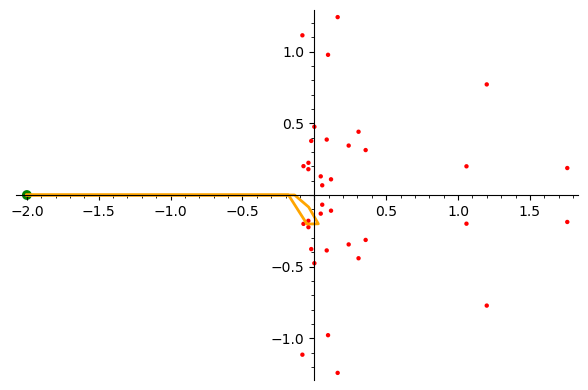

In [45]:
plot_critical_points_Qsurface = list_plot([[c.real(), c.imag()] for c in quartic_surface.critical_values], color="red", pointsize=10)
plot_basepoint_Qsurface = list_plot([[c.real(), c.imag()] for c in [quartic_surface.basepoint]], color="green", pointsize=50)
plot_paths_Qsurface = [list_plot([[c.real(), c.imag()] for c in path], True, color="orange", thickness=2) for path in quartic_surface.paths]

plot_paths_Qsurface[4] + plot_critical_points_Qsurface + plot_basepoint_Qsurface

In [46]:
%time quartic_surface.picard_fuchs_equation(1)

INFO:lefschetz_family.hypersurface:[2] Computing Picard-Fuchs equations of 21 forms in dimension 2
INFO:lefschetz_family.hypersurface:[2] Operator [1/21] has order 6 and degree 174 for form with numerator of degree 0
INFO:lefschetz_family.hypersurface:[2] Operator [2/21] has order 6 and degree 317 for form with numerator of degree 4
INFO:lefschetz_family.hypersurface:[2] Operator [3/21] has order 6 and degree 318 for form with numerator of degree 4
INFO:lefschetz_family.hypersurface:[2] Operator [4/21] has order 6 and degree 317 for form with numerator of degree 4
INFO:lefschetz_family.hypersurface:[2] Operator [5/21] has order 6 and degree 317 for form with numerator of degree 4
INFO:lefschetz_family.hypersurface:[2] Operator [6/21] has order 6 and degree 317 for form with numerator of degree 4
INFO:lefschetz_family.hypersurface:[2] Operator [7/21] has order 6 and degree 316 for form with numerator of degree 4
INFO:lefschetz_family.hypersurface:[2] Operator [8/21] has order 6 and degr

CPU times: user 1min 11s, sys: 457 ms, total: 1min 11s
Wall time: 1min 11s


(43620354537677251932346072516329117778065842776073842536558209527138637255336097473905820507282063393009602047364572259919569938302694991560984106824723333772192061986212706971798131209934529420575127872019658378794877947586722768684704646191863665241359942400751996783913121291673395661520991155574698830512177664278605468750000000000000000*t^317 - 2155991611486374508761511115138474581893860415801367718839635389600287672463049078143662024170438358659083643872680501162828770275789166925636651030307828993105688820960230908340667933751193694130770078106871187497105920709345595786965794686193879411440154692742018608785327254629813892568658235328523094872747661904201455859375000000000000000*t^316 + 518176176950482701118198255773486984285939557224318368466605610424818818619321497420555220362880344438120279280132562251095178814882928841673206118968907889928387472968322273014867491214432339085339830736638187169801307636301639147494970990510591155900797533412831453224764191040629012502507858745

In [47]:
quartic_surface.picard_fuchs_equation(0).order(), quartic_surface.picard_fuchs_equation(0).degree()

(6, 174)

### Same method for elliptic surfaces

In [48]:
from lefschetz_family import EllipticSurface
logging.getLogger('lefschetz_family.ellipticSurface').setLevel(logging.INFO)

In [49]:
R3.<X,Y,Z> = PolynomialRing(QQ)
S.<t> = PolynomialRing(R3)

In [50]:
P = Y^2*Z - X*(X^2 - 2*t*(t^2+1)*X*Z + t^2*(t + 1)^4*Z^2)

In [51]:
ES = EllipticSurface(P, nbits=800)

INFO:lefschetz_family.ellipticSurface:Fundamental group computed in 00:00:00.


In [52]:
plot_points([c for c in ES.critical_values if c!='infinity'], color="red", pointsize=50) + plot_points([ES.basepoint], color="green", pointsize=50)

In [53]:
show(ES.monodromy_matrices)

INFO:lefschetz_family.hypersurface:[1] Computing fundamental group with 6 critical values.
INFO:lefschetz_family.hypersurface:[1] Fundamental group computed in 00:00:00.
INFO:lefschetz_family.hypersurface:[1] Computing Picard-Fuchs equations of 2 forms in dimension 1
INFO:lefschetz_family.hypersurface:[1] Operator [1/2] has order 2 and degree 9 for form with numerator of degree 0
INFO:lefschetz_family.hypersurface:[1] Operator [2/2] has order 2 and degree 23 for form with numerator of degree 3
INFO:lefschetz_family.hypersurface:[1] Computing numerical transition matrices of operator of order 3 and degree 9 (27 edges total).
INFO:lefschetz_family.hypersurface:[1] Integration finished -- total time: 00:00:02.
INFO:lefschetz_family.hypersurface:[1] Reconstructed homology from monodromy -- total time: 00:00:00.
INFO:lefschetz_family.ellipticSurface:Computing numerical transition matrices of operator of order 3 and degree 6 (17 edges total).
INFO:lefschetz_family.ellipticSurface:Integration

[
[-3 -4]  [ 5 16]  [ 1  0]  [ 9  8]  [-3 -4]
[ 1  1], [-1 -3], [-1  1], [-8 -7], [ 1  1]
]

In [54]:
[t+str(n) if t in ['I', 'I*'] else t for t, _, n in ES.types]

['I*1', 'I1', 'I1', 'I8', 'I*1']

In [55]:
i=0
show(ES.monodromy_matrices[i])

[-3 -4]
[ 1  1]

In [56]:
_, C, _ = ES.types[i]
C^-1*ES.monodromy_matrices[i]*C

[-1 -1]
[ 0 -1]

In [57]:
show([C^-1*M*C for M in ES.monodromy_matrices_morsification[i]])

[
[1 1]  [ 1  0]  [1 1]  [ 1  0]  [1 1]  [ 1  0]  [1 1]
[0 1], [-1  1], [0 1], [-1  1], [0 1], [-1  1], [0 1]
]

In [58]:
show(ES.monodromy_matrices_morsification[i])

[
[ 3  4]  [1 1]  [ 3  4]  [1 1]  [ 3  4]  [1 1]  [ 3  4]
[-1 -1], [0 1], [-1 -1], [0 1], [-1 -1], [0 1], [-1 -1]
]

In [59]:
show(ES.monodromy_matrices_morsification)

[[
[ 3  4]  [1 1]  [ 3  4]  [1 1]  [ 3  4]  [1 1]  [ 3  4]
[-1 -1], [0 1], [-1 -1], [0 1], [-1 -1], [0 1], [-1 -1]
],
 [
[ 5 16]
[-1 -3]
],
 [
[ 1  0]
[-1  1]
],
 [
[ 2  1]  [ 2  1]  [ 2  1]  [ 2  1]  [ 2  1]  [ 2  1]  [ 2  1]  [ 2  1]
[-1  0], [-1  0], [-1  0], [-1  0], [-1  0], [-1  0], [-1  0], [-1  0]
],
 [
[ 3  4]  [1 1]  [ 3  4]  [1 1]  [ 3  4]  [1 1]  [ 3  4]
[-1 -1], [0 1], [-1 -1], [0 1], [-1 -1], [0 1], [-1 -1]
]]

In [60]:
len(flatten(ES.monodromy_matrices_morsification))

24

In [61]:
len(ES.homology)

22

In [62]:
%time ES.period_matrix

INFO:lefschetz_family.ellipticSurface:Computing numerical transition matrices of operator of order 3 and degree 6 (17 edges total).
INFO:lefschetz_family.ellipticSurface:Integration finished -- total time: 00:00:00.


CPU times: user 409 ms, sys: 144 ms, total: 553 ms
Wall time: 1.26 s


[                                                                                                                                                                                                                                   [+/- 1.07e-223] + [10.216231435665113070244389011503547605755592741506563131457962590274323215498225294168511988946626144955535722429981220752485682781590639414494873932873101301290641599406678476551656661862741948121632430467191056620739681454 +/- 4.02e-223]*I  [-8.8475159542271548821171143736275243755310297193183502226744266213559532746236585875393633033591852478631142681331624030209290220634598386622634408473132786362804933163941940365372881712988157210561537984479683541540848690262 +/- 7.41e-224] + [5.108115717832556535122194505751773802877796370753281565728981295137161607749112647084255994473313072477767861214990610376242841390795319707247436966436550650645320799703339238275828330931370974060816215233595528310369840727 +/- 2.21e-223]*I                      

In [63]:
ES.period_matrix.dimensions()

(1, 22)